In [2]:
import numpy as np
import matplotlib.pyplot as plt

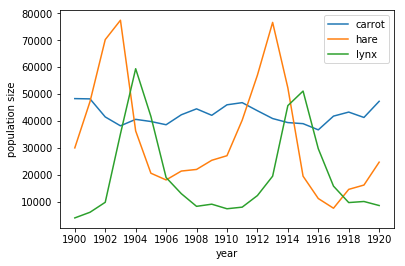

In [3]:
#1
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
time = data[:,0]
plt.plot(time,data[:,3], label = "carrot")
plt.plot(time,data[:,1], label = "hare")
plt.plot(time,data[:,2], label = "lynx")
plt.xticks(np.arange(1900,1921, step = 2))
plt.ylabel("population size")
plt.xlabel("year")
plt.legend()
plt.show()

In [4]:
print data

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(data)? (<ipython-input-4-d5bd85cc9860>, line 1)

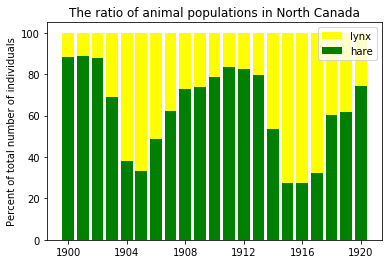

In [50]:
#2
plt.bar(time, 100, color = "yellow", label = "lynx")
plt.bar(time, 100*data[:,1]/(data[:,1]+data[:,2]), color = "green", label = "hare")
plt.title("The ratio of animal populations in North Canada")
plt.xticks(np.arange(1900,1921, step = 4))
plt.ylabel("Percent of total number of individuals")
plt.legend()
plt.show()

medium: [34080.95238095 20166.66666667 42400.        ]
Standard deviation: [20897.90645809 16254.59153691  3322.50622558]


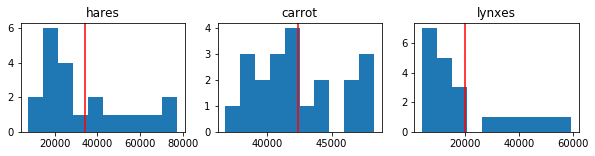

In [59]:
#3
m = data.mean(axis = 0)
mask = [False, True, True, True]
SD= pow(pow((data - m), 2).mean(axis=0), 1/2) #здесьSD - среднеквадратичное отклонение
print("medium:",m[mask])
print("Standard deviation:",SD[mask])
figure,plots = plt.subplots(1, 3, figsize = (10,2))
plots[0].hist(data[:, 1])
plots[0].set_title('hares')
plots[0].axvline(x=m[1], color='red')
plots[1].hist(data[:, 3])
plots[1].set_title('carrot')
plots[1].axvline(x=m[3], color='red')
plots[2].hist(data[:, 2])
plots[2].set_title('lynxes')
plots[2].axvline(x=m[2], color='red')
plt.show()

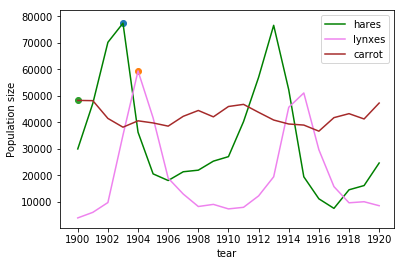

In [68]:
#4
s = data[data.argmax(axis = 0)[mask], 0]

plt.plot(time,data[:,1], color = "green", label = "hares")
plt.plot(time,data[:,2], color = "violet", label = "lynxes")
plt.plot(time,data[:,3], color = "brown", label = "carrot")
plt.xticks(np.arange(1900,1921, step = 2))

plt.xlabel("year")
plt.ylabel("Population size")
plt.legend()

plt.scatter(time[data[:,1].argmax()], data[:,1].max())
plt.scatter(time[data[:,2].argmax()], data[:,2].max())
plt.scatter(time[data[:,3].argmax()], data[:,3].max())
plt.show()

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


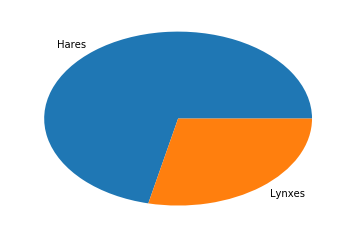

In [74]:
#5
distr = np.where(data[:,1] >= data[:,2], 'H', 'L').tolist()
print(distr)
plt.pie([distr.count('H'), distr.count('L')], labels = ['Hares','Lynxes'])
plt.show()

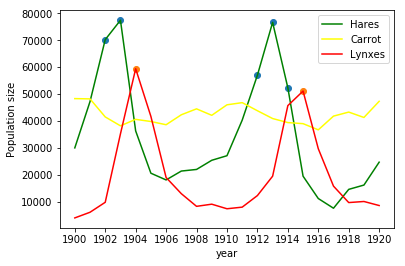

In [80]:
#6
plt.scatter(time[data[:,1]>50000],data[:,1][data[:,1]>50000])
plt.scatter(time[data[:,2]>50000],data[:,2][data[:,2]>50000])
plt.scatter(time[data[:,3]>50000],data[:,3][data[:,3]>50000])
plt.plot(time,data[:,1], color = "green", label = "Hares")
plt.plot(time,data[:,3], color = "yellow", label = "Carrot")
plt.plot(time,data[:,2], color = "red", label = "Lynxes")
plt.xticks(np.arange(1900,1921, step = 2))
plt.xlabel("year")
plt.ylabel("Population size")
plt.legend()
plt.show()

In [81]:
#7
print(np.transpose(time[np.argsort(data, axis=0)[0:2]])[mask])

[[1917. 1916.]
 [1900. 1901.]
 [1916. 1903.]]


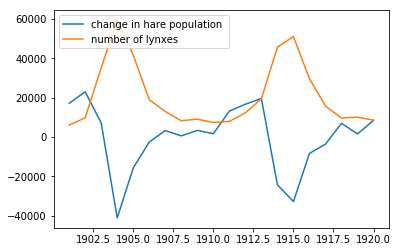

-0.8494801603656876


In [84]:
#8
ch_hares = data[1:,1] - data[:20,1]
plt.plot(time[1:], ch_hares, label = "change in hare population ")
plt.plot(time[1:], data[1:,2], label = "number of lynxes")
plt.legend()
plt.show()
print(np.corrcoef(ch_hares,data[1:,2])[1,0])

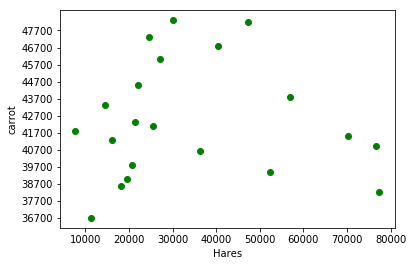

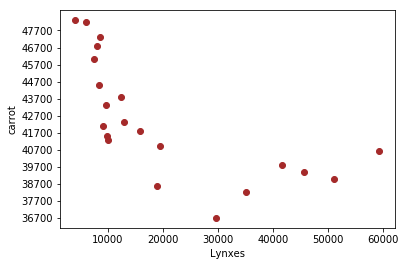

In [89]:
#9
plt.scatter(data[:,1],data[:,3], color = "green")
plt.yticks(np.arange(data[:,3].min(),data[:,3].max(),1000))
plt.xlabel("Hares")
plt.ylabel("carrot")
plt.show()
plt.scatter(data[:,2],data[:,3], color = "brown")
plt.yticks(np.arange(data[:,3].min(),data[:,3].max(),1000))
plt.xlabel("Lynxes")
plt.ylabel("carrot")
plt.show()

In [97]:
#10
import sklearn.linear_model as lm
RS = lm.LinearRegression()
ch_hares = data[1:20,1] - data[:19,1]
lynxes = data[:19,2].reshape(-1,1)
RS.fit(lynxes,ch_hares)
prediction = reg.predict(data[20,2])[0] + data[19,1]
print(prediction)
print(np.abs(prediction / data[20, 1] - 1))

24364.929407444484
0.013565611034636271
